In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
# set parameters
length_phi = 15   #length of swiss roll in angular direction
length_Z = 15     #length of swiss roll in z direction
sigma = 0.7       #noise strength
m = 10000         #number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
Z = length_Z*np.random.rand(m)
X = 1./6*(phi + sigma*xi)*np.sin(phi)
Y = 1./6*(phi + sigma*xi)*np.cos(phi)

swiss_roll = np.array([X, Y, Z]).transpose()

# check that we have the right shape
print(swiss_roll.shape)

(10000, 3)


In [4]:
# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=200, epsilon='bgh', alpha=1.0, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(swiss_roll)

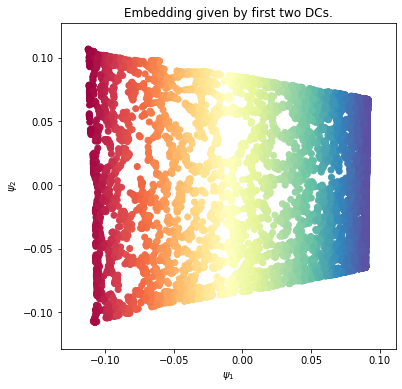

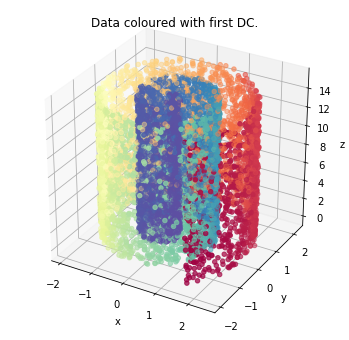

In [5]:
from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})

plt.show()

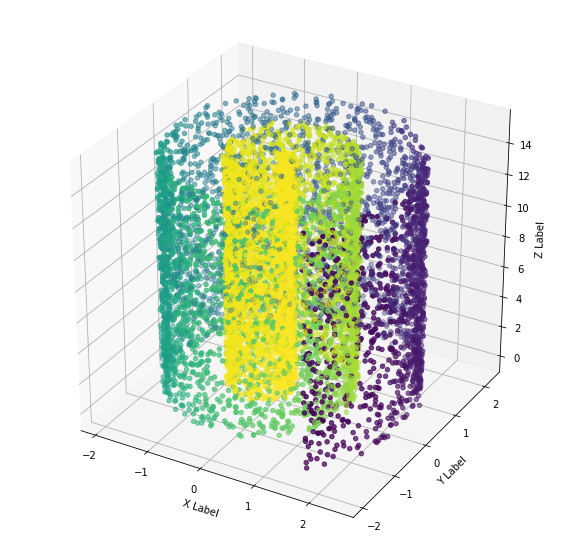

In [7]:
df = pd.DataFrame(mydmap.data, columns=['x','y','z'])
df['color'] = dmap[:,0]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(swiss_roll[:,0], swiss_roll[:,1], swiss_roll[:,2], cmap='viridis', c=df['color'])


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [8]:
df.head().to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &         x &         y &         z &     color \\\\\n\\midrule\n0 &  0.346381 & -0.105122 &  1.914927 &  0.091068 \\\\\n1 &  2.383992 &  0.144124 &  9.767025 & -0.097426 \\\\\n2 &  2.048126 & -1.538079 &  6.142769 & -0.108600 \\\\\n3 &  0.140701 & -0.456431 &  0.910520 &  0.090634 \\\\\n4 & -0.804412 &  0.184326 &  1.454936 &  0.085593 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [9]:
df.to_csv('swiss_roll.csv', index=False)